# Stack Overflow Developer Survey Analysis and Prediction project

This notebook will go through the CRISP-DM process:
1. **Business Understanding & Data Gathering**:
 Using the Stack Overflow Developer survey, especially the 2020 survey, I will review a list of things about the developers, such as their employment, skills, collaboration with each other, tools, and more.

2. **Data Inspection & Cleaning:**
    I will inspect the data for any missing values and outliers, and then clean the missing data appropiately.

3. **Exploratory Data Analysis (EDA) & Visualization:**
    I will will preform exploratory data analysis to create graphs which can help in understand the distributions, answering business questions about collaboration between developers and tools, adoption of technology, problem-solving and list of companies characteristics over developers' career.

4. **Modeling:**
    I will build a classification model, using Decision Tree Classifier, to predict job satisfaction (i.e., `JobSat` column)

5. **Evaluation:**
    I will evaluate the model's `accuracy`, `recall`, `prescion` and `f1 scores`. In addtion, a classification report will be created to view these metrics and check for underfitting / overfitting.

6. **Deployment/Prediction Scenario**
    I will create a new sceanario, based on some features, run a prediction using these new data and interpret the results. These will come from a csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

%matplotlib inline

## 1. Data Gathering and Inspection

The data is provided from a CSV content file named: `survey_results_public.csv`.
This is the developer survey from the year 2020.

In [2]:
data = pd.read_csv('survey_results_public.csv')

print("Dataset Shape:", data.shape)
print("\nDataset Columns:")
print(data.columns.tolist())

print("\nDataset Information:")
print(data.info())

print("\nDataset Description:")
print(data.describe)

print("\nSummary of Missing Values:")
print(data.isnull().sum())

Dataset Shape: (64461, 61)

Dataset Columns:
['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 

In [3]:
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## 2. Data Cleaning

The file `survey_results_public.csv`, has different variables used which are:
- Categorical Variables
- Numerical Variables

This file has many fields that contains 'NA' as a string. In order to deal with this, I will change these to actual values and handle them with care.

**How to handle Missing Values:**
- For **Categorical variables**: fill missing values with either a placeholder (e.g. `"Missing"`) or a mode of all strings.
- For **Numerical variables**: fill missing values with either with `0` or with the median.

In [4]:
def data_cleaning(df):
    """
    Clean the CSV file:
        - Convert all "NA" strings to np.nan using replace function
        - All categorical columns with missing values will be filled with "Missing"
        - All numerical columns with missing values with the median values
    Args:
        df (pd.DataFrame):
            - Raw input data from the csv file.
    Returns:
        Cleaned DataFrame.
    """
    #df = df.replace("NA", np.nan)
    df = df.dropna()

    numeric_cols = ['WorkWeekHrs', 'YearsCode', 'YearsCodePro']

    for cols in numeric_cols:
        if cols in df.columns:
            df[cols] = pd.to_numeric(df[cols], errors="coerce")
            median_values = df[cols].median()
            df[cols] = df[cols].fillna(median_values)

    for cols in df.columns:
        if cols not in numeric_cols:
            df[cols] = df[cols].fillna("Missing")

    df["RemoteWork"] = df["JobFactors"].str.contains("remote work", case=False, na=False)
    df["ExperienceBin"] = pd.cut(df["YearsCode"], bins=[0, 10, 20, 30, 100],
                                    labels=["0-10", "11-20", "21-30", "31+"])

    return df

data_clean = data_cleaning(data.copy())
print("\nMissing Values after cleaning:")
print(data_clean.isnull().sum())


Missing Values after cleaning:
Respondent       0
MainBranch       0
Hobbyist         0
Age              0
Age1stCode       0
                ..
WorkWeekHrs      0
YearsCode        0
YearsCodePro     0
RemoteWork       0
ExperienceBin    0
Length: 63, dtype: int64


In [5]:
model_data = data_clean[data_clean["JobSat"] != "Missing"].copy()
print("\nData Shape after dropping rows with missing JobSat:", model_data.shape)


Data Shape after dropping rows with missing JobSat: (4213, 63)


## 3. Exploratory Data Analysis (EDA) and Visualization

The next few cells will be used to perfrom exploratory data analysis.

### a) Distribution between Work Week Hours and Coding Experience
Using the `WorkWeekHrs` and `YearsCode`, we will be able to gain some insights into the developers' work routine

c:\Users\Tolu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Tolu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Tolu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


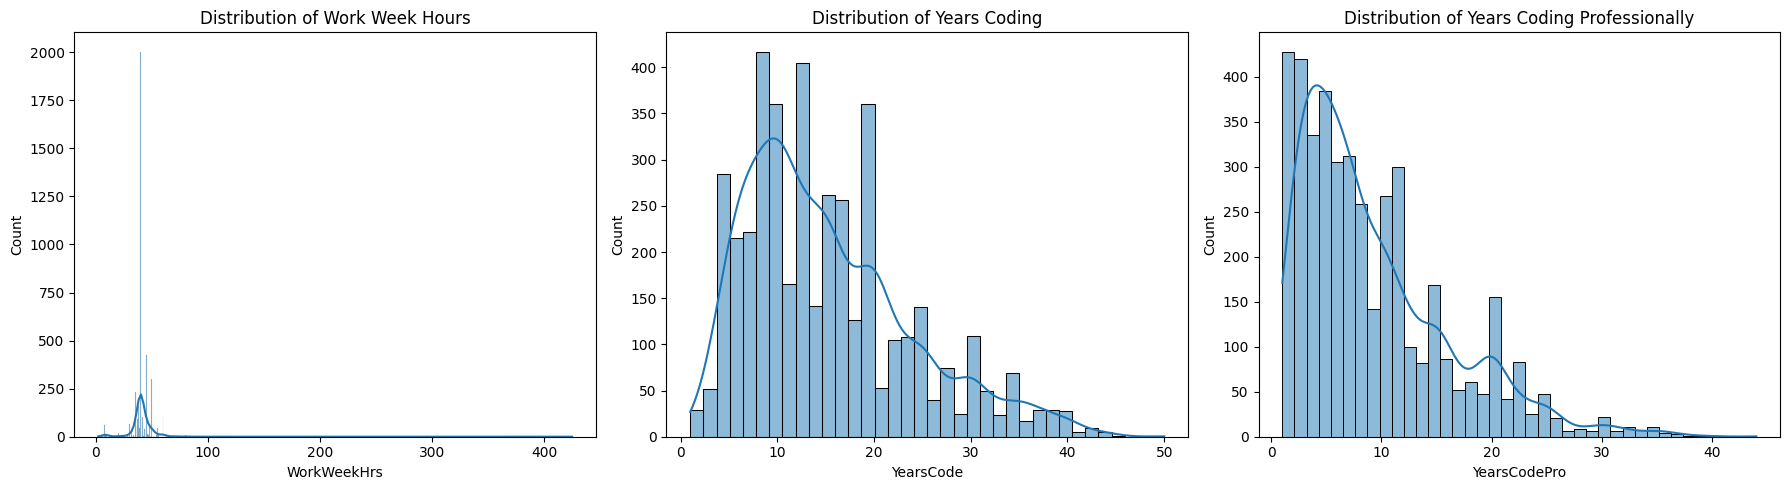

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

columns = ["WorkWeekHrs", "YearsCode", "YearsCodePro"]
titles = ["Distribution of Work Week Hours",
          "Distribution of Years Coding",
          "Distribution of Years Coding Professionally"
        ]

for i in range(3):
    sns.histplot(data_clean[columns[i]], kde=True, ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

### b) Business Question Visualizations

For each busineess question, I will  give an explaination of what is need to create the approiate visualization

1. **How did the transition to remote work in 2020 influence developers' work-life balance, (e.g., workweek hours and overtime frequency)?**
    - This can be done using the columns `JobFactors`, `WorkWeekHrs`, and `NEWOvertime`.
    - I will use a both a violin plot and a bar chart to demonstrate these frequenices.

2. **What were the trends in adopting new technologies in 2020 across different experience levels?**
    - This can be done using `YearsCode`, `YearsCodePro`, `LanguageWorkedWith`, `MiscWorkedWith`, `PlatformWorkedWith` and `WebframeWorkedWith` columns to get their experinces and what programming languages they have used. 
    - *[`MiscWorkedWith`, `PlatformWorkedWith` and `WebframeWorkedWith` can be ignored]*

    - I can use a bar chart to show the experience and plot the frequenices from the fields [i.e., `LanguageWorkedWith`]

3. **How did developers’ problem-solving strategies change in 2020 due to global events?**
    - This can be done using `NEWStuck`. 
    - *In addition, if we want to show how developers seek and/or learn alternative resources when they face problem then `NEWLearn` column can be considered*

    - Bar charts can be used to show the distribution of how developers repsone to a problem.
    - *Using both `NEWStuck` and `NEWLearn` can be used to compare the different ways that developers try to problem-solve*

4. **How do company size and work policies impact developer career satisfaction?**
    - This uses `OrgSize`, `JobSat`, `JobFactors`, and `WeekWorkHrs` columns.

    - Bar charts can be used to compare the job satisfaction (`JobSat`) across different company sizes (`OrgSize`) while also using work polices (`JobFactors`).
    - *Another way is to put all job satisfaction within each company size to show how much satisfaction is showed*

5. **How did educational background influence job opportunities and career growth in 2020?**
    - This uses the following columns; `UndergradMajor`, `JobSeek`, `JobSat`, `NEWJobHunt`, and `NEWJobHuntResearch`. *(, `EdLevel`, and `DevType` may be used also but is not needed)*

    - Finally, using a bar chart to show the developers repsones and provide insights into how education can affect career opportunity.
    - *By grouping `UndergradMajor` and job related metrics, we will be able to see comparisons across different educational background*

In [ ]:
# Cell that contains functions for the graphs and charts used

def grouped_bar(df, group_column, count_col, title):
    """
    Plot a grouped bar chart showing counts of count_col values grouped by group_column.
    Args:
        df: the dataset from DataFrame
        group_column:
        count_cols:
        title: Title of the graph
    """
    count_data = df[[group_column, count_col]].value_counts().reset_index(name="Count")
    sns.barplot(data=count_data, x=group_column, y="Count", hue=count_col)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.legend(title=count_col)
    plt.show()

def simple_bar(x, y, title):
    """
    Plot a simple bar chart for the frequency of values in a column.
    """
    sns.barplot(x=x.values, y=y.index, palette="viridis")
    plt.title(title)
    plt.xlabel("Number of Responses")
    plt.ylabel("Problem-Solving Strategy")
    plt.xticks(rotation=90)
    plt.show()

def is_remote(x):
    if "Remote work" in x:
        return "Remote"
    else:
        return "Non-Remote"

def removed_semi(x):
    if x != "Missing":
        return x.split(";")[0]
    else:
        return "Missing"


def experience(years):
    """
    Assign experience level based on YearsCodePro value.
    """
    if years < 5:
        return "Novice"
    elif years < 15:
        return "Intermediate"
    else:
        return "Expert"


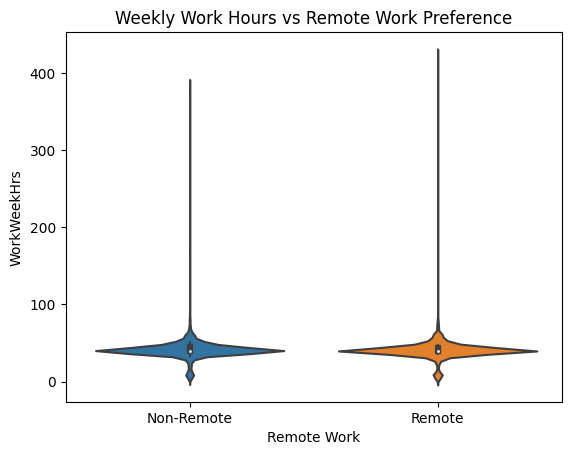

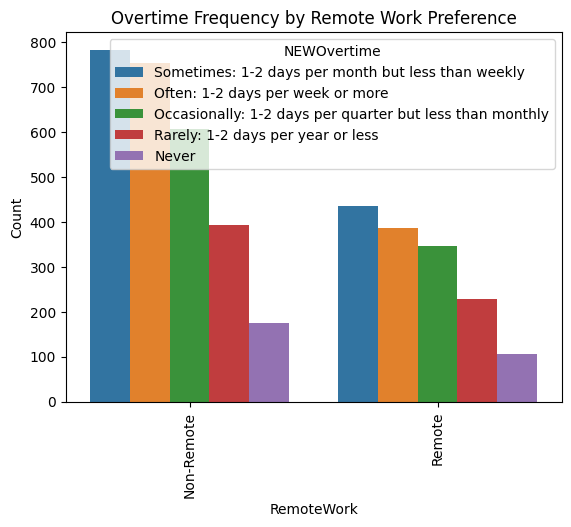

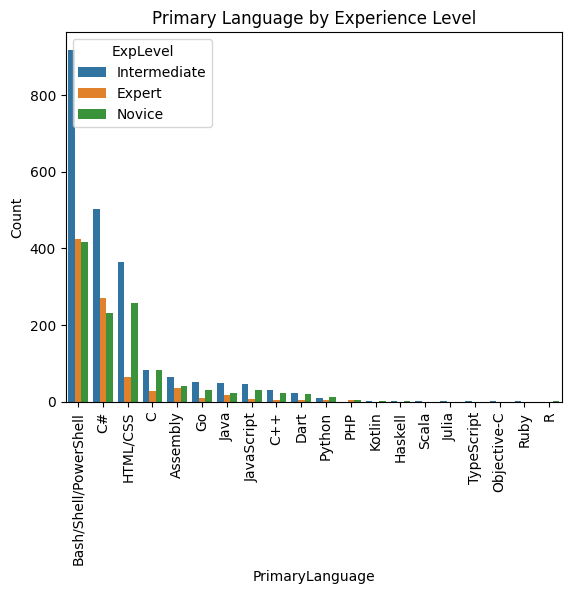

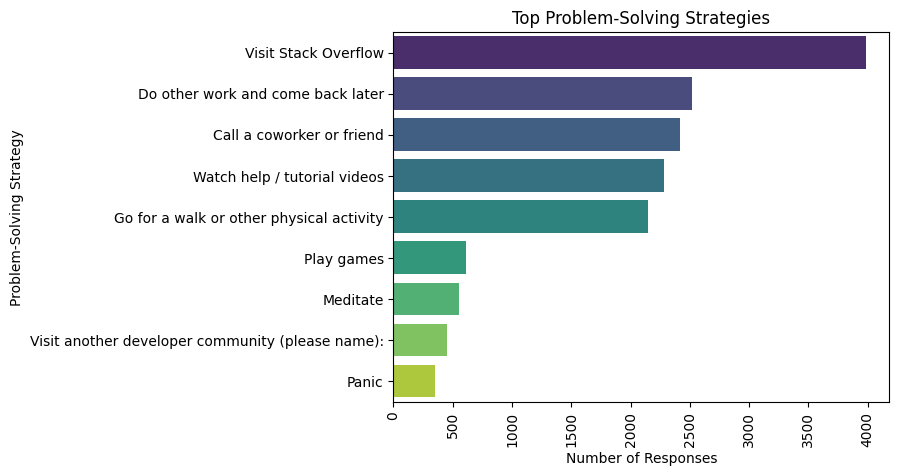

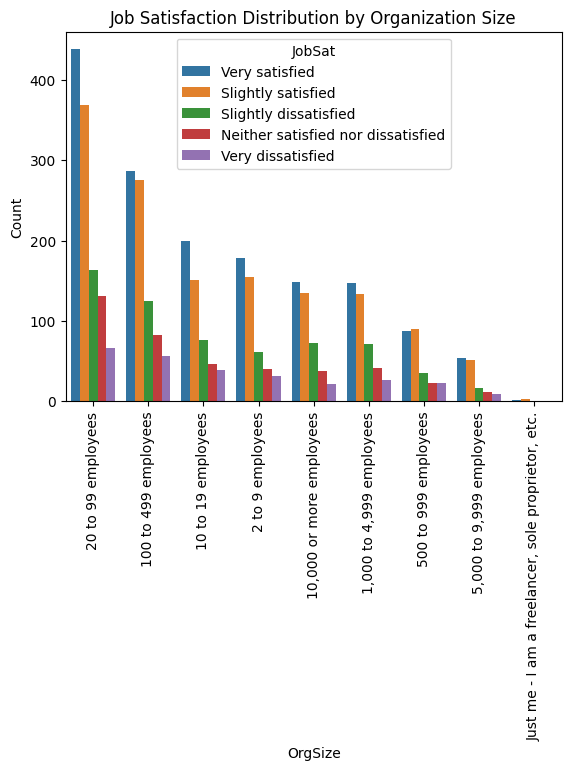

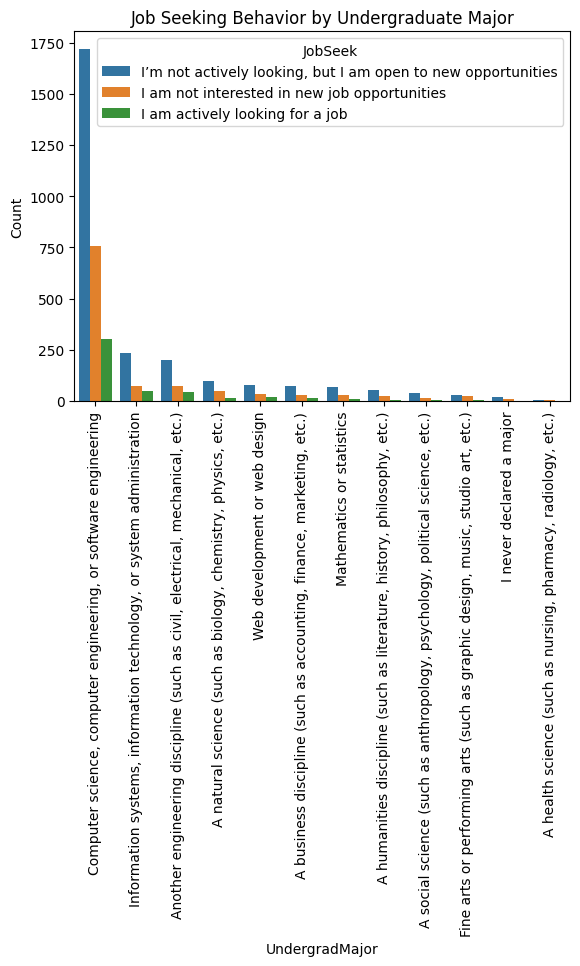

In [ ]:
# Question 1 Graph
data_clean["RemoteWork"] = data_clean["JobFactors"].apply(is_remote)

plt.figure()
sns.violinplot(data=data_clean, x="RemoteWork", y="WorkWeekHrs")
plt.title("Weekly Work Hours vs Remote Work Preference")
plt.xlabel("Remote Work")
plt.ylabel("WorkWeekHrs")
plt.show()

grouped_bar(data_clean, "RemoteWork", "NEWOvertime", "Overtime Frequency by Remote Work Preference")

# Question 2 Graph
data_clean["ExpLevel"] = data_clean["YearsCodePro"].apply(experience)
data_clean["PrimaryLanguage"] = data_clean["LanguageWorkedWith"].apply(removed_semi)
program_lang = data_clean[data_clean["PrimaryLanguage"] != "Missing"]

program_count = program_lang[["ExpLevel", "PrimaryLanguage"]].value_counts().reset_index(name="Count")

sns.barplot(data=program_count, x="PrimaryLanguage", y="Count", hue="ExpLevel")
plt.title("Primary Language by Experience Level")
plt.xticks(rotation=90)
plt.show()

# Question 3 Graph
all_strats = data_clean["NEWStuck"].str.split(";").explode()
strats_counts = all_strats.value_counts()
top_strats = strats_counts.head(10)

simple_bar(top_strats, top_strats, "Top Problem-Solving Strategies")

# Question 4 Graph
grouped_bar(data_clean, "OrgSize", "JobSat", "Job Satisfaction Distribution by Organization Size")

# Question 5 Graph
undergrad_major = data_clean["UndergradMajor"]
number_major = undergrad_major.value_counts()

top_majors = number_major.head(20).index.tolist()

undergrad_data = data_clean[undergrad_major.isin(top_majors)]
grouped_bar(undergrad_data, "UndergradMajor", "JobSeek", "Job Seeking Behavior by Undergraduate Major")


## 4. Modeling: Predicting Job Satisfaction (JobSat)

Now I will build a machine learning model that will predicts the `JobSat` on developers based on some features

**Step to build the model for the data:**
- Drop rows where the `JobSat` feature is missing.
- Select a subset of features (both numerical and categorical) that can go along with the feature.
- The target variable (`JobSat`) is kept as in its original form.
- Split the data into training and test sets, the train a Decision Tree Classifier model

In [9]:
def prepare_model_data(df, target_cols, features):
    """
    Prepare the data for modeling by selecting features.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_col (str): The name of the target column.
        features (list): List of feature column names to use.

    Returns:
        X(pd.DataFrame): The featues.
        y (np.array): The target variable.
    """
    X = df[features].copy()
    y = df[target_cols]
 
    return X, y

numeric_cols = ["WorkWeekHrs", "YearsCode", "YearsCodePro"]

X, y = prepare_model_data(model_data, "JobSat", numeric_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Accuracy: {:.4f}".format(accuracy))
print("Model Recall (weighted): {:.4f}".format(recall))
print("Model Precision (weighted): {:.4f}".format(precision))
print("Model F1 score (weighted): {:.4f}".format(f1))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.2975
Model Recall (weighted): 0.2975
Model Precision (weighted): 0.2856
Model F1 score (weighted): 0.2906

Classification Report:
                                    precision    recall  f1-score   support

Neither satisfied nor dissatisfied       0.10      0.07      0.08       137
             Slightly dissatisfied       0.17      0.15      0.16       184
                Slightly satisfied       0.34      0.39      0.36       417
                 Very dissatisfied       0.06      0.06      0.06        72
                    Very satisfied       0.38      0.38      0.38       454

                          accuracy                           0.30      1264
                         macro avg       0.21      0.21      0.21      1264
                      weighted avg       0.29      0.30      0.29      1264



## 5. Prediction Scenario

A new csv file named `scenario_prediction.csv` is used. This file contains a few scenarios based on the features.

**An Example Scenario:**
Imagine a new survey respondent based on the following:

- **WorkWeekHrs:** 40
- **YearsCode:** 10
- **YearsCodePro:** 5

Based on these feature, I will use the model predict their job satisfaction.

In [12]:
def predict_job_sat(csv_file, feature_columns):
    """
    Predict job satisfaction for sample input loaded from a csv file.

    Args:
        csv_file (str): path to the csv file containing new data.
        feature_columns (list): List of feature columns to use for prediction.

    Returns:
        predictions (np.array): Predicted Job satisfaction values.
    """
    predict_data = pd.read_csv(csv_file)
    X_new = predict_data.copy()
    preds = dtc.predict(X_new)

    return preds

prediction_job = predict_job_sat("scenario_prediction.csv", numeric_cols)

print("\nPredictions from the CSV file:")
number = 1
for pred in prediction_job:
    print("Developer {}: Predicted Job Satisfaction feels [{}]".format(number, pred))
    number += 1


Predictions from the CSV file:
Developer 1: Predicted Job Satisfaction feels [Very satisfied]
Developer 2: Predicted Job Satisfaction feels [Very satisfied]
Developer 3: Predicted Job Satisfaction feels [Very satisfied]
Developer 4: Predicted Job Satisfaction feels [Slightly satisfied]
Developer 5: Predicted Job Satisfaction feels [Neither satisfied nor dissatisfied]
Developer 6: Predicted Job Satisfaction feels [Very satisfied]
Developer 7: Predicted Job Satisfaction feels [Very satisfied]
Developer 8: Predicted Job Satisfaction feels [Neither satisfied nor dissatisfied]
Developer 9: Predicted Job Satisfaction feels [Neither satisfied nor dissatisfied]
Developer 10: Predicted Job Satisfaction feels [Slightly satisfied]


## 6. Summary and Conclusions

**Exploratory Findings:**  
- **Remote Work & Work-life Balance:** 
    - The graph shows the distribution of the Weekly work hours (`WeekWorkHrs`) between developers who values remote work and those who don't.
    - The grouped bar chart of `NEWOvertime` further shows the differences in overtime frequency.

- **Technology Adoption:** 
    - Developers report using various programming languages and platforms, with noticeable trends in the technologies they desire versus those they work with.  
    - A heatmap is used to show the programming languages that are popular and more prevalent.

- **Problem-Solving:** 
    - Responses to job hunt and learning questions vary widely, indicating differing approaches to professional development.
    - The graph reveals the strategies that developers use when the find a problem. 

- **Company Size and Satisfaction:** 
    - Employment type and organization size vary, which in turn may influence career satisfaction and working hours.

- **Educational Background and Career Growth**
    - A bar chart is used to compare `UndergradMajor` with different strategies in jub hunting.
    - This shows that a strong education is important and can influence a developer career opposrtunites.

- **Data Cleaning**  
    - A way to deal with missing values was to replace all "NA" strings to actual missing values (using np.nan).
    - Based on the type of columns, either categorical or numeric, with fill the missing values with appropriate values.
    - This is used based on simplicity.
 
- **Modeling:**  
    - We built a Decision Tree Classifier to predict `JobSat`.  
    - The evaluation scores (accuracy recall, precision, f1) provide an insight into how well the model distinguishes between different satisfaction levels.
 
- **Prediction Scenario:**  
    - For a sample developer with given features, the model will try to predicts their job satisfaction 
        - (e.g. "Slightly satisfied" or "Very dissatisfied").